In [2]:
import numpy as np
import pandas as pd
from ase import Atoms
from ase import neighborlist
from ase import units
from ase.io.trajectory import Trajectory
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.api import qqplot
from scipy import stats
from statsmodels.graphics.tsaplots import plot_predict
import statsmodels.api as sm

plt.rc('font', family="sans-serif", weight="bold")          # controls default text sizes
plt.rc('axes', labelsize=15, titlesize=15)    # x and y axes
plt.rc('xtick', labelsize=15)    # Major Ticks
plt.rc('ytick', labelsize=15)    # Major Ticks
plt.rc('xtick.minor', visible=True)    # Minor Ticks
plt.rc('ytick.minor', visible=True)    # Minor Ticks
plt.rc('legend', fontsize=10)    # Legend
plt.rc('figure', titlesize=10)  # Figure title


plt.rcParams['figure.dpi'] = 300
print(plt.rcParams['font.family'])

['sans-serif']


# Load data

In [3]:
force_df = pd.read_csv("Data/Moldyn_dataframe.csv")
atoms = ["C1", "C2", "O", "H1", "H2", "H3", "H4", "H5", "H6"]

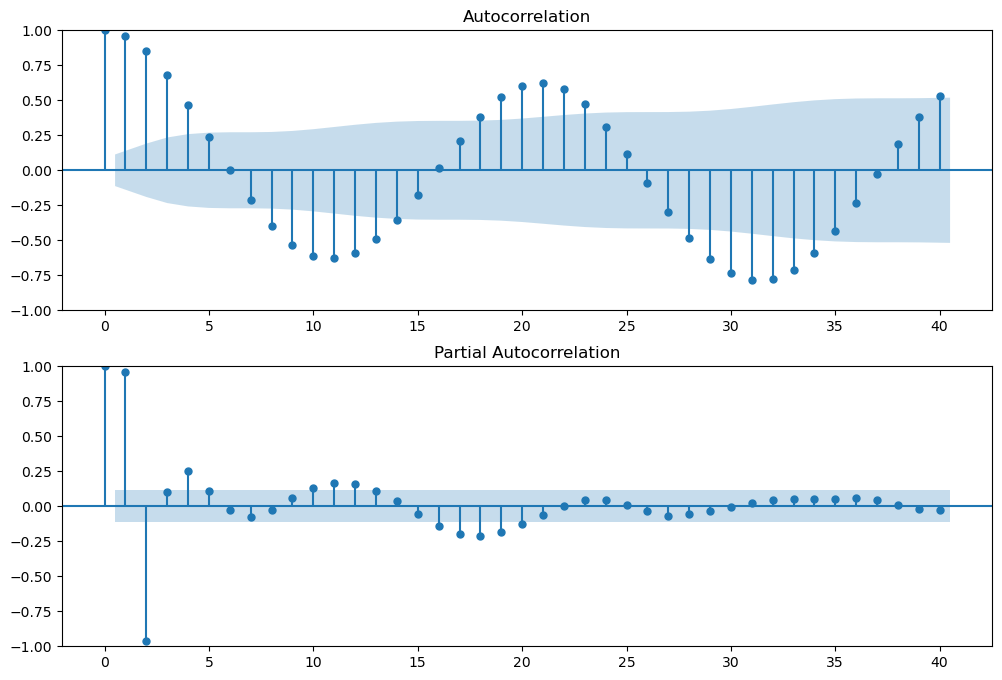

In [121]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(force_df['O(x)'], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(force_df['O(x)'], lags=40, ax=ax2)

In [4]:
arma_mod = ARIMA(force_df['O(x)'], order=(3, 1, 4)).fit()
print(arma_mod.summary())


c:\Users\Birk Dissing\anaconda3\envs\MM\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                   O(x)   No. Observations:                  301
Model:                 ARIMA(3, 1, 4)   Log Likelihood                 896.404
Date:                Tue, 19 Dec 2023   AIC                          -1776.808
Time:                        16:41:12   BIC                          -1747.177
Sample:                             0   HQIC                         -1764.949
                                - 301                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          2.5413      0.093     27.374      0.000       2.359       2.723
ar.L2         -2.2270      0.172    -12.926      0.000      -2.565      -1.889
ar.L3          0.6623      0.089      7.403      0.0

c:\Users\Birk Dissing\anaconda3\envs\MM\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


NormaltestResult(statistic=614.7176700283319, pvalue=3.27909492571443e-134)

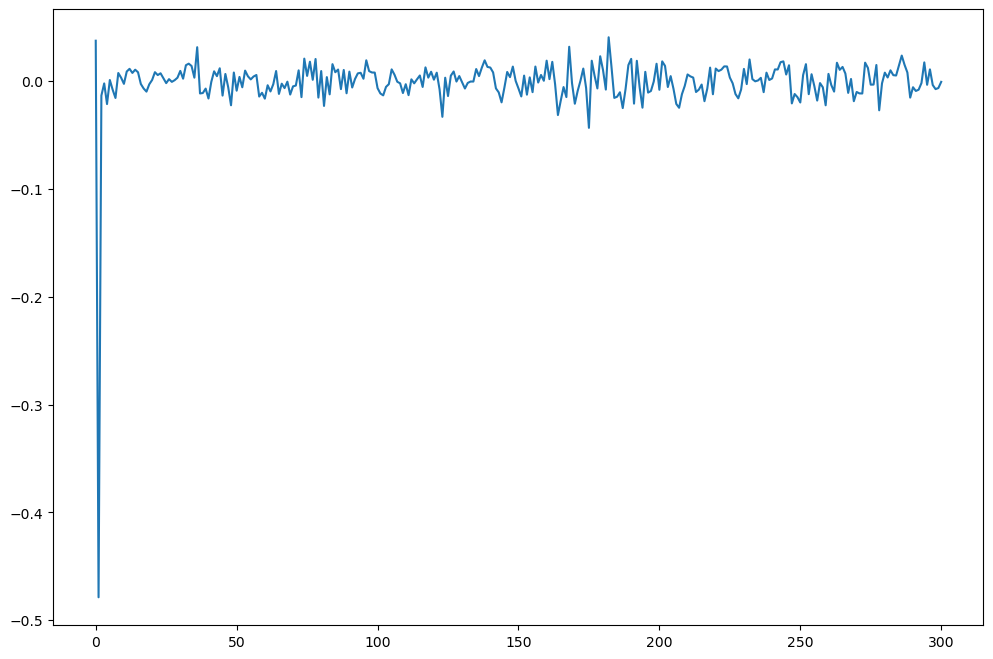

In [5]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
ax = arma_mod.resid.plot(ax=ax)

resid = arma_mod.resid

stats.normaltest(resid)

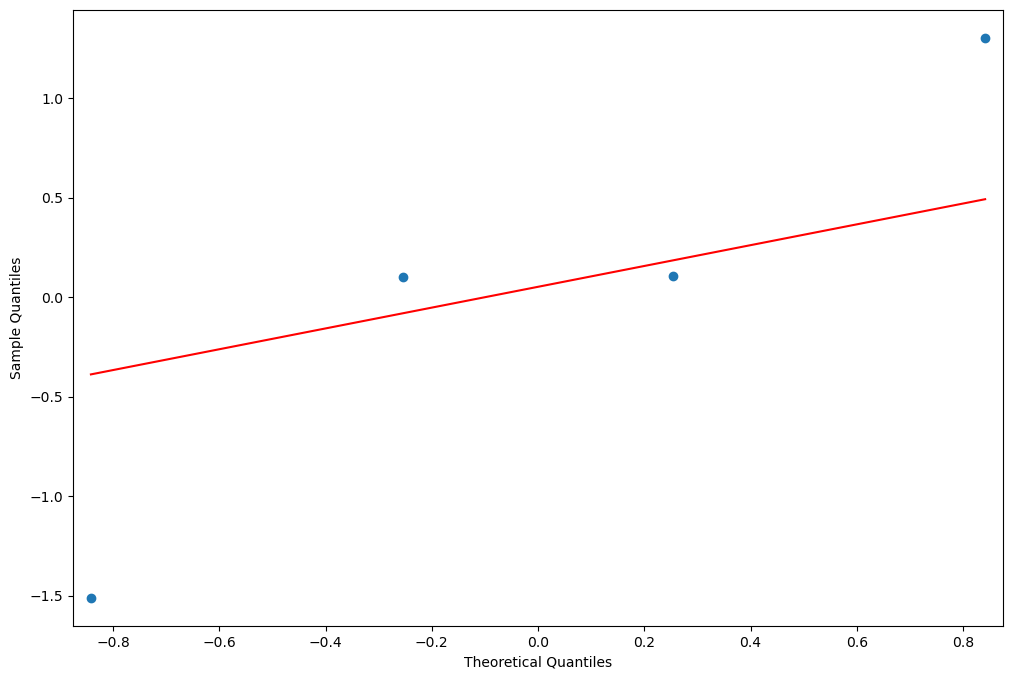

In [25]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
fig = qqplot(resid, line="q", ax=ax, fit=True)

In [111]:
ARIMA_data = np.zeros(len(force_df['O(x)']))
i=0
interval = 4
while i < len(force_df['O(x)']):
    arma_mod = ARIMA(force_df['O(x)'][i:i+interval], order=(2, 0, 1)).fit()
    i +=interval
    ARIMA_data[i:i+interval] = arma_mod.predict(start=i, end=i+interval-1)
    i+=interval

c:\Users\Birk Dissing\anaconda3\envs\MM\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Birk Dissing\anaconda3\envs\MM\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Birk Dissing\anaconda3\envs\MM\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Birk Dissing\anaconda3\envs\MM\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization 

ValueError: could not broadcast input array from shape (4,) into shape (1,)

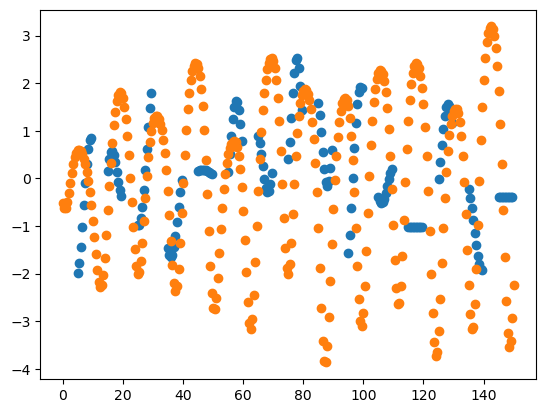

In [110]:
mask = ARIMA_data != 0
plt.scatter(force_df['Unnamed: 0'][mask]*0.5, ARIMA_data[mask])
plt.scatter(force_df['Unnamed: 0']*0.5, force_df['C1(y)'])

c:\Users\Birk Dissing\anaconda3\envs\MM\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\Birk Dissing\anaconda3\envs\MM\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


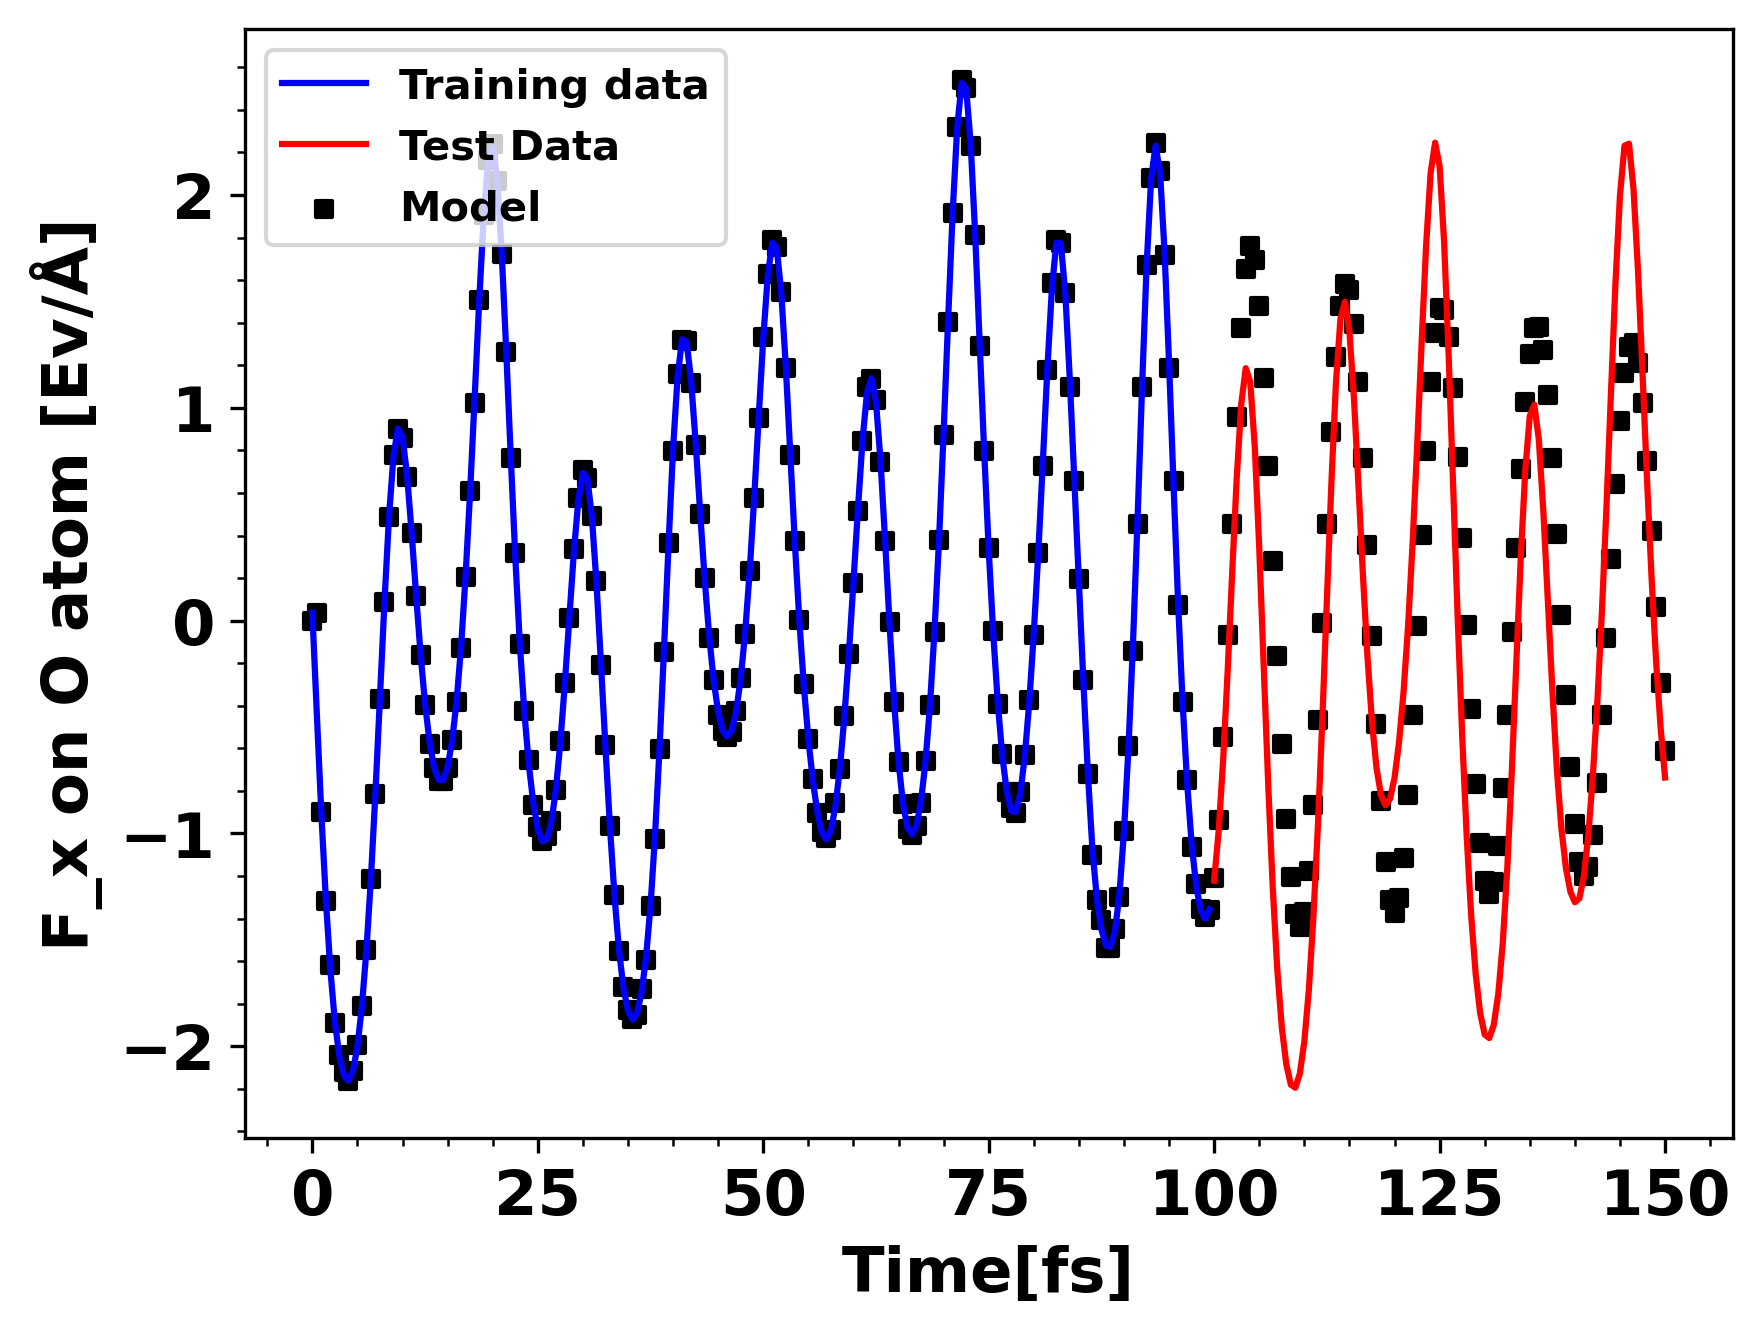

In [130]:
arma_mod = ARIMA(force_df['O(x)'][:200] , order=(6, 1, 4)).fit()
pred = arma_mod.predict(start=0, end=300) 

plt.plot(force_df['Unnamed: 0'][0:200]*0.5, force_df['O(x)'][0:200], color="blue", label="Training data")
plt.plot(force_df['Unnamed: 0'][200:]*0.5, force_df['O(x)'][200:], color="Red", label="Test Data")
plt.scatter(np.arange(301)*0.5, pred, label="Model", s=15, marker="s", color="Black")
plt.xlabel("Time[fs]", fontweight="bold")
plt.ylabel("F_x on O atom [Ev/Å]", fontweight="bold")
plt.legend(loc="upper left")

Text(0, 0.5, 'Residual')

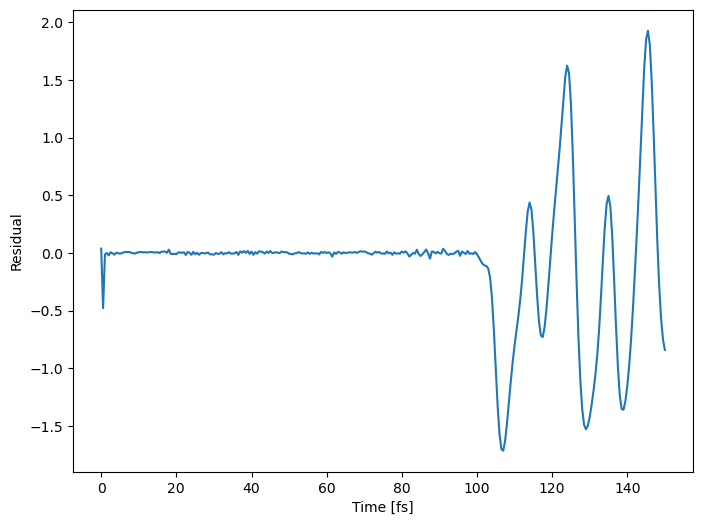

In [99]:
resid = force_df['O(x)']-pred

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(force_df['Unnamed: 0']*0.5, resid)
ax.set_xlabel("Time [fs]")
ax.set_ylabel("Residual")

c:\Users\birk\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


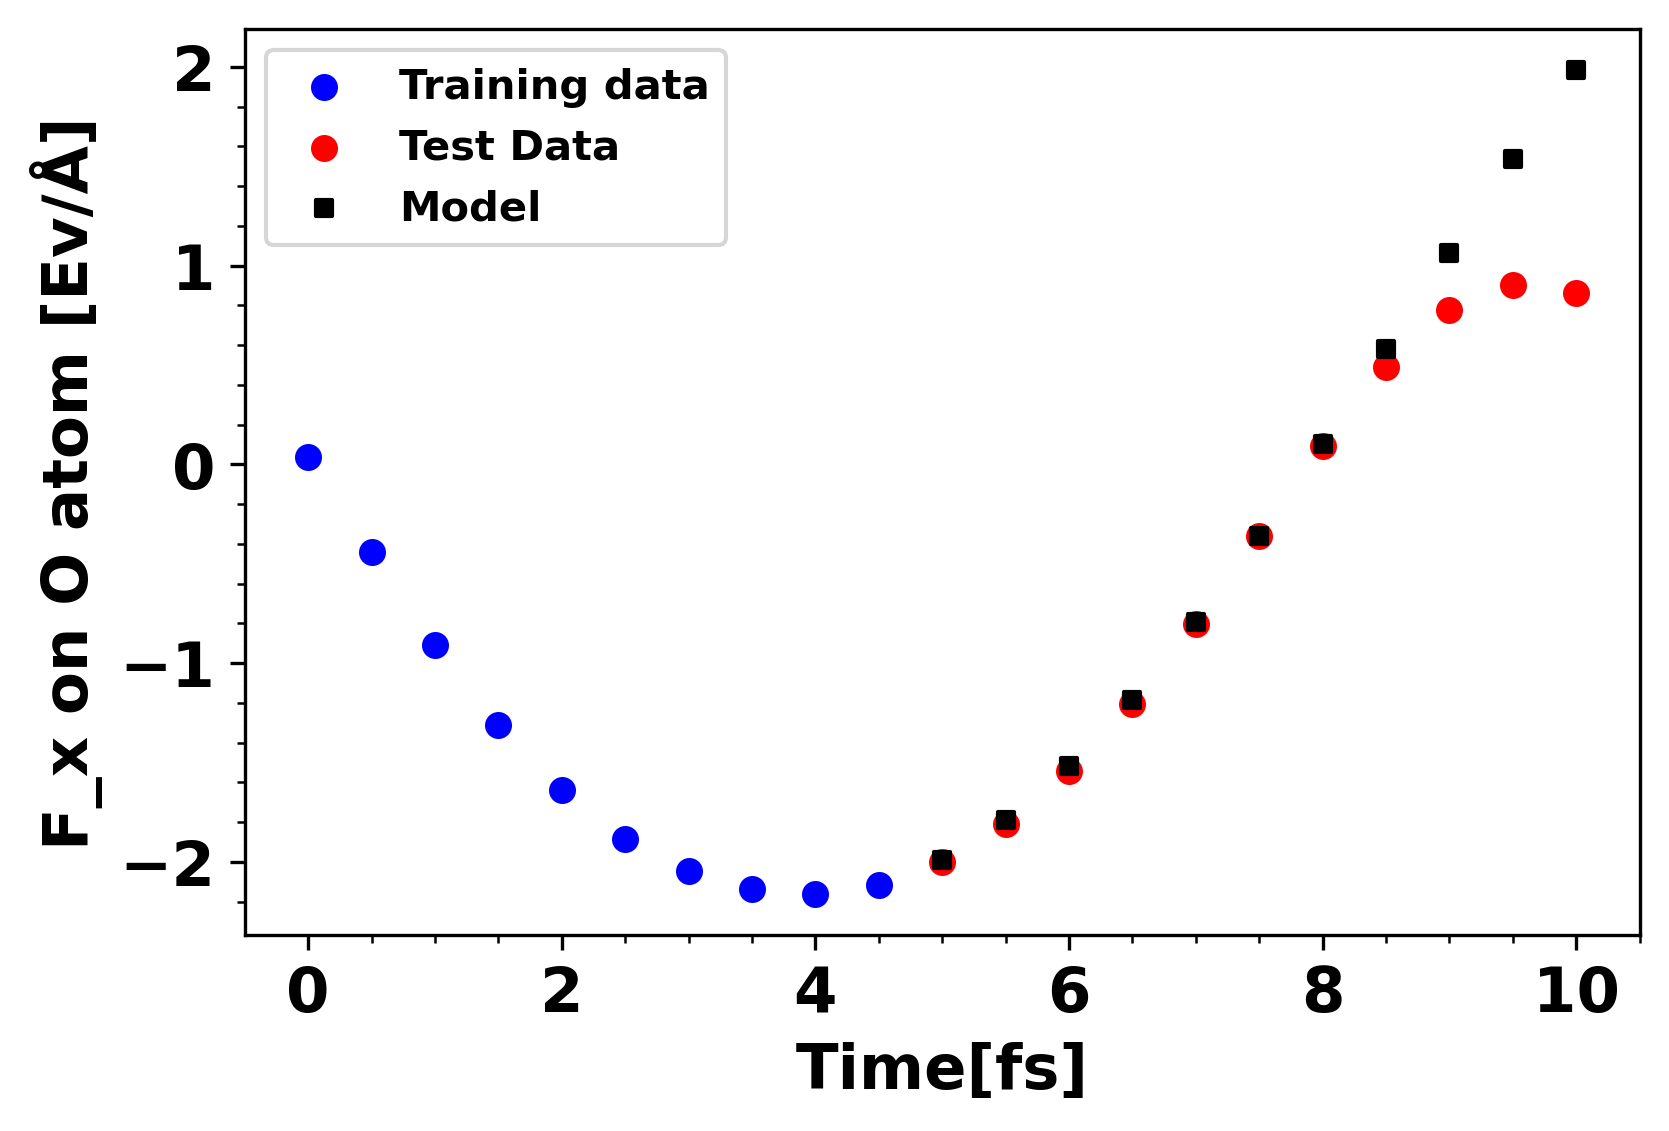

In [5]:
input = 10
arma_mod = ARIMA(force_df['O(x)'][:input], order=(2, 0, 0)).fit()

pred = arma_mod.predict(start=input, end=20) 
arma_res = abs(pred-force_df['O(x)'][input:21])

plt.scatter(force_df['Unnamed: 0'][0:input]*0.5, force_df['O(x)'][0:input], color="blue", label="Training data", s=30)
plt.scatter(force_df['Unnamed: 0'][input:21]*0.5, force_df['O(x)'][input:21], color="Red", label="Test Data", s=30)
plt.scatter(np.arange(input, 21)*0.5, pred, label="Model", s=15, marker="s", color="Black")
plt.xlabel("Time[fs]", fontweight="bold")
plt.ylabel("F_x on O atom [Ev/Å]", fontweight="bold")
plt.legend()